<img src='../res/matplotlib_ico.webp'>

# matplotlib库学习
https://matplotlib.org/

简单来说，Matplotlib 是 Python 的一个绘图库。它包含了大量的工具，你可以使用这些工具创建各种图形，包括简单的散点图，正弦曲线，甚至是三维图形。Python 科学计算社区经常使用它完成数据可视化的工作。

---

---
# 目录
## 1. [常用基础图表函数](#1.常用基础图表函数)
## 2. [plot原型函数(绘制直线)](#2.plot原型函数(绘制直线))


## 3. [scatter函数原型(散点图)](#3.scatter函数原型(散点图))


## 4. [bar函数原型(柱状图)](#4.bar函数原型(柱状图))
## 5. [pie函数原型(饼图)](#5.pie函数原型(饼图))

## 6. [polar函数原型(极坐标图|雷达图)](#6.polar函数原型(极坐标图|雷达图))
## 7. [热力图](#7.热力图)

## 8. [3D图](#8.3D图)
## 9. [热图](#9.热图)
## 10. [读取图像](#10.读取图像)
## 11. [color,marker和line格式字符串](#11.color,marker和line格式字符串)


---

---
# 1.常用基础图表函数

**常用基础图表函数**：

plt.plot()绘制**坐标图**

plt.boxplot()**箱形图**

plt.bar()**条形图**

plt.barh()**横向条形图**

plt.polar()**极坐标图**

plt.pie()**饼图**

plt.psd()**功率谱密度图**

plt.specgram()**谱图**

plt.cohere() **X-Y的相关性函数图**

plt.scatter()**散点图**

plt.step()**步阶图**

plt.hist()**直方图**

plt.contour()**等值图**

plt.vlines()**垂直图**

plt.stem()**柴火图**

plt.plot_date()**数据日期**

---
# 2.plot原型函数(绘制直线)

``` python
plt.plot(*args, **kwargs)
```

**参数说明**

* **x, y**: array-like or scalar
    
* **fmt**: str, optional
    
* **data**: indexable object, optional(An object with labelled data. If given, provide the label names to plot in *x* and *y*.)

* **scalex, scaley**: bool, optional, default: True(These parameters determined if the view limits are adapted to the data limits. The values are passed on to autoscale_view.)

* **alpha**: float (0.0 transparent through 1.0 opaque) 

* **animated**: bool 

* **color or c**: any matplotlib color 

* **dashes**: sequence of on/off ink in points 

* **fillstyle**: ['full' | 'left' | 'right' | 'bottom' | 'top' | 'none'] 

* **marker**: :mod: A valid marker style <matplotlib.markers>

* **markeredgecolor or mec**: any matplotlib color 

* **markeredgewidth or mew**: float value in points 

* **markerfacecolor or mfc**: any matplotlib color 

* **markerfacecoloralt or mfcalt**: any matplotlib color 

* **markersize or ms**: float 

* **rasterized**: bool or None 

* **visible**: bool 

* **xdata**: 1D array 

* **ydata**: 1D array 

* **zorder**: float 

In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei'] # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False # 用来正常显示负号
plt.rcParams['figure.figsize'] = (8.0, 4.0) # 生成图的大小

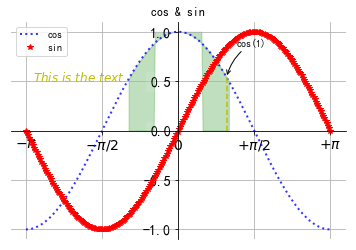

In [3]:
# endpoint=True，包括一定包括stop点
# linspace(start, stop, num=50, endpoint=True)
x = np.linspace(-np.pi, np.pi, 256, endpoint=True) 
c,s = np.cos(x), np.sin(x)
plt.figure(1) # 定义一个图像窗口

# label为图例，linewidth为线的宽度，linestyle为线的风格，alpha为透明度
plt.plot(x, c, color='blue', linewidth=2.0, linestyle=':', label='cos', alpha=0.8)
plt.plot(x, s, 'r*', label='sin')
plt.title("cos & sin") # 图的标题

ax = plt.gca() # 获取当前坐标轴信息/获取当前画布焦点
ax.spines['right'].set_color('none') # 设置右边的边框为无颜色
ax.spines['top'].set_color('none')
ax.spines['left'].set_position(('data',0)) # 设置左边的边框为无颜色，同时设置y轴的位置为0，
ax.spines['bottom'].set_position(('data',0)) # set_position必须为['left']和['bottom']
ax.xaxis.set_ticks_position('bottom') # 配置x刻度是标注在坐标的上方还是下方
ax.yaxis.set_ticks_position('left') # 配置y刻度是标注在坐标的左侧还是右侧

# plt.xticks(*args, **kwargs) 设置坐标轴刻度和刻度显示
# locs : array_like
# labels : array_like, optional
plt.xticks([-np.pi, -np.pi/2., 0, np.pi/2., np.pi], 
           [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$']) # latex语法
plt.yticks(np.linspace(-1, 1, 5, endpoint=True))

# 获取x,y轴的locs和labels组成的Text列表，[Text(-3.14159,0,'$-\\pi$'),...]
for label in ax.get_xticklabels()+ax.get_yticklabels():
    label.set_fontsize(14) # 设置字体的大小
    # matplotlib.text.Text.set_bbox(self, rectprops), Draw a bounding box around self
    # facecolor调节box前景色，edgecolor设置边框，本处设置边框为无，alpha设置透明度
    label.set_bbox(dict(facecolor='white', edgecolor='None', alpha=0.1))

plt.legend(loc='upper left') # 图例的位置为左上
plt.grid() # 显示背景网格
# plt.axis([-1,1,-0.5,1]) # 需要显示的坐标范围

# ??填充两个函数之间的区域，使用fill_between函数
# plt.fill_between(x, y1, y2=0, where=None, interpolate=False,
#         step=None, hold=None, data=None, **kwargs)
plt.fill_between(x, np.abs(x)<0.5, c, c>0.5, color='green', alpha=0.25)
# 对函数与坐标轴之间的区域进行填充，使用fill函数
# plt.fill(x, s, color='green', alpha=0.25)

t = 1
plt.plot([t,t], [0,np.cos(t)], 'y', linewidth=1.5, linestyle='--') # 画一条直线

# annotate添加注释 
# plt.annotate(*args, **kwargs)
# s : str, The text of the annotation    
# xy : iterable, Length 2 sequence specifying the *(x,y)* point to annotate    
# xytext : iterable, optional, Length 2 sequence specifying the *(x,y)* to place the 
#          text at.  If None, defaults to ``xy``. 
#          参数xycoords='data' 是说基于数据的值来选位置
# xycoords : str, Artist, Transform, callable or tuple, optional,对于标注位置的描述
# textcoords : str, `Artist`, `Transform`, callable or tuple, optional,
#             对于标注位置xy 偏差值
# arrowprops : dict, optional, 对图中箭头类型的一些设置
# annotation_clip : bool, optional
plt.annotate('cos(1)', xy=(t, np.cos(1)), xycoords='data',xytext=(+10,+30)
                       ,textcoords='offset points'
                       ,arrowprops=dict(arrowstyle='->',
                        connectionstyle='arc3, rad=0.2'))
# plt.text(x, y, s, fontdict=None, withdash=False, **kwargs)
plt.text(-3, 0.5, r'$This\ is\ the\ text.$',
         fontdict={'size': 12, 'color': 'y'}) # fontdict={'size': 12, 'color': 'r'})

plt.show()

---
# 3.scatter函数原型(散点图)

``` python
plt.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, hold=None, data=None, **kwargs)
```

**参数说明**

matplotlib.markers.MarkerStyle


* **x, y** : array_like, shape (n, ), The data positions.

* **s** : scalar or array_like, shape (n, ), optional

* **c** : color, sequence, or sequence of color, optional, default: 'b'
    * The marker color. Possible values:
    1. A single color format string.
    2. A sequence of color specifications of length n.
    3. A sequence of n numbers to be mapped to colors using *cmap* and *norm*.
    4. A 2-D array in which the rows are RGB or RGBA.

* **marker** : type: matplotlib.markers.MarkerStyle, optional, default: 'o'

* **cmap** : type: matplotlib.colors.Colormap, optional, default: None

* **norm** :type: matplotlib.colors.Normalize, optional, default: None

* **vmin, vmax**: scalar, optional, default: None

* **alpha** : scalar, optional, default: None

* **linewidths** : scalar or array_like, optional, default: None

* **verts** : sequence of (x, y), optional

* **edgecolors** : color or sequence of color, optional, default: 'face'
    * The edge color of the marker. Possible values:
    1.'face': The edge color will always be the same as the face color.
    2. 'none': No patch boundary will be drawn.
    3. A matplotib color.

In [4]:
plt.cla() # 清除axes，即当前 figure 中的活动的axes，但其他axes保持不变。
plt.clf() # 清除当前 figure 的所有axes，但是不关闭这个 window，能继续复用于其他的 plot。
plt.close() # 关闭 window，如果没有指定，则指当前 window。
% matplotlib inline

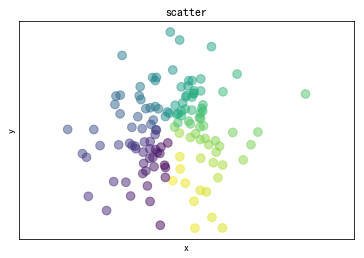

In [5]:
fig = plt.figure() # 定义一个图像窗口
# ax = fig.add_subplot(331) # fig.add_subplot(111, facecolor='r', projection='polar')
ax = fig.add_subplot(111) # fig.add_subplot(111, facecolor='r', projection='polar')

n = 128
# np.random.normal(loc=0.0, scale=1.0, size=None),分别为均值、方差以及个数
X = np.random.normal(0, 1, n)
Y = np.random.normal(0, 1, n)
# np.arctan2(x1, x2, /, out=None, *, where=True, casting='same_kind', order='K', 
#               dtype=None, subok=True[, signature, extobj])
T = np.arctan2(X, Y)

# plt.axes([0.025, 0.025, 0.95, 0.95])
# plt.scatter(X, Y, s=75, c=T, alpha=0.5)
ax.scatter(X, Y, s=75, c=T, alpha=0.5, marker='o')
plt.xlim(-1, 1), plt.xticks([]) # plt.xlim设置参数范围
plt.ylim(-1, 1), plt.yticks([])
# 设置坐标范围
plt.axis('equal') # axis('equal')，axis('off')，...  axis([xmin, xmax, ymin, ymax])
plt.title('scatter')

plt.xlabel('x')
plt.ylabel('y')
plt.show()

---
# 4.bar函数原型(柱状图)
``` python
plt.bar(*args, **kwargs)
```

**参数说明**

* **x** : sequence of scalars(The x coordinates of the bars. See also *align* for the alignment of the bars to the coordinates.)

* **height** : scalar or sequence of scalars(The height(s) of the bars.)

* **width** : scalar or array-like, optional(The width(s) of the bars (default: 0.8).)

* **bottom** : scalar or array-like, optional(The y coordinate(s) of the bars bases (default: 0).)

* **align** : {'center', 'edge'}, optional, default: 'center'

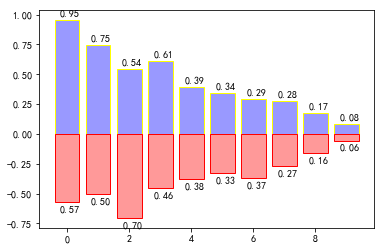

In [6]:
n = 10
X = np.arange(n)
# uniform(low=0.0, high=1.0, size=None)
Y1 = (1 - X/float(n)) * np.random.uniform(0.5, 1.0, n)
Y2 = (1 - X/float(n)) * np.random.uniform(0.5, 1.0, n)
fig.add_subplot(332)
plt.bar(X, +Y1, facecolor='#9999ff', edgecolor='yellow')
plt.bar(X, -Y2, facecolor='#ff9999', edgecolor='red')
# ax = fig.add_subplot(332)
# ax.bar(X, +Y1, facecolor='#9999ff', edgecolor='white')
# ax.bar(X, -Y2, facecolor='#ff9999', edgecolor='white')

# zip接受任意多个序列作为参数，返回一个tuple列表，如[(1,2),(1,3)]
for x,y in zip(X,Y1):
    plt.text(x+0.1, y+0.025, '%.2f'%y, ha='center', va='bottom')
for x,y in zip(X,Y2):
    plt.text(x+0.1, -y-0.025, '%.2f'%y, ha='center', va='top')
plt.show()

---
# 5.pie函数原型(饼图)

``` python
plt.pie(x, explode=None, labels=None, colors=None, autopct=None, pctdistance=0.6,shadow=False, labeldistance=1.1, startangle=None, radius=None, counterclock=True, wedgeprops=None, textprops=None, center=(0, 0), frame=False, rotatelabels=False, hold=None, data=None)
```

**参数说明**

* **x**：(每一块)的比例，如果sum(x) > 1会使用sum(x)归一化

* **explode**：(每一块)离开中心距离

* **labels**：(每一块)饼图外侧显示的说明文字

* **colors**：(每一块)饼图显示的颜色

* **autopct**：圆里面的文本格式，%3.1f%%表示小数有三位，整数有一位的浮点数

* **pctdistance**：百分比的text离圆心的距离

* **shadow**：饼是否有阴影，default: False

* **labeldistance**：文本的位置离远点有多远，default: 1.1倍

* **startangle**：起始角度，0，表示从0开始逆时针转，为第一块。一般选择从90度开始比较好看，float, optional, default: None

* **radius**：控制饼图半径，float, optional, default: None

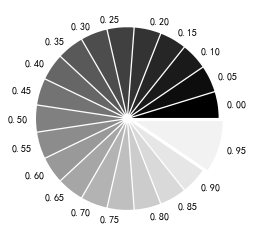

In [7]:
fig.add_subplot(333)
n = 20
Z = np.ones(n)
Z[-1] = Z[-1]*2
plt.pie(Z, explode=Z*0.05, colors=['%f'%(i/float(n)) for i in range(n)],
       labels=['%.2f'%(i/float(n)) for i in range(n)])
plt.gca().set_aspect('equal') # plt.axis('equal')
plt.xticks([]),plt.yticks([]) # 设置坐标轴刻度和刻度显示为空
plt.show()

---
# 6.polar函数原型(极坐标图|雷达图)

``` python
plt.polar(*args, **kwargs)
```

**简版**
``` python
plt.polar(theta, r, **kwargs)
```

极坐标系中的点由一个夹角和一段相对于中心位置的距离来表示。其实在plot（）函数里面本来就有一个polar的属性，让他为True就行了


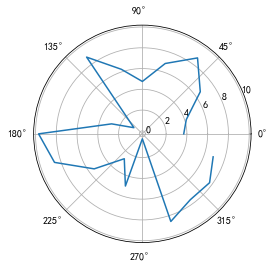

In [8]:
# 方式一
fig.add_subplot(334)
n = 20
theta = np.arange(0.0, 2*np.pi, 2*np.pi/n)
radii = 10 * np.random.rand(n) # 返回一个或一组服从“0~1”均匀分布的随机样本值
# plt.plot(theta, radii) #折线图
plt.polar(theta, radii)
plt.show()

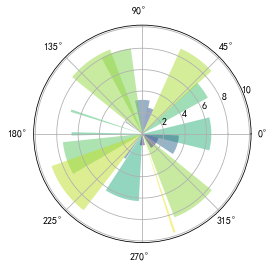

In [9]:
# 方式二
N = 20
theta = np.linspace(0.0,2*np.pi, N, endpoint=False)
radii = 10 * np.random.rand(N)
width = np.pi / 4 * np.random.rand(N)
ax = plt.subplot(111, projection = 'polar')
bars = ax.bar(theta, radii, width=width, bottom=0.0)  
# 前三个参数分别对应left,height,width,left表示从哪开始，表示开始位置，
# height表示从中心点向边缘绘制的长度
for r,bar in zip(radii,bars):
# 使用for循环对每一个绘图区域进行颜色和透明度的设置，若是没有这个那么全是蓝色
    bar.set_facecolor(plt.cm.viridis(r/10.))
    bar.set_alpha(0.5)
plt.show()

---
# 7.热力图

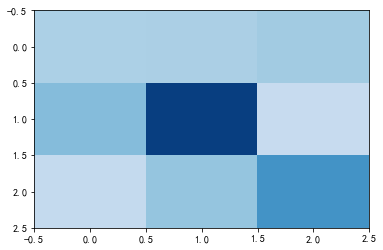

In [10]:
# fig.add_subplot(335)
from matplotlib import cm
data = np.random.rand(3, 3)
cmap = cm.Blues
map = plt.imshow(data, interpolation='nearest', cmap=cmap, aspect='auto', vmin=0, vmax=1)
# plt.show()

---
# 8.3D图

In [11]:
from mpl_toolkits.mplot3d import Axes3D
ax = fig.add_subplot(336, projection='3d')
ax.scatter(1, 1, 3, s=100)
plt.show()

---
# 9.热图

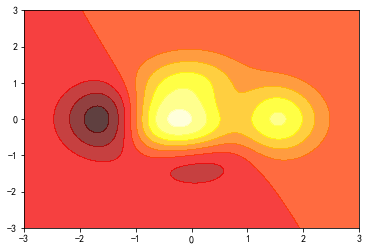

In [12]:
fig.add_subplot(313)
def f(x, y):
    return (1-x/2 +x**5 + y**3) * np.exp(-x**2 - y**2)
n = 256
x = np.linspace(-3, 3, n)
y = np.linspace(-3, 3, n)
X, Y = np.meshgrid(x, y)
plt.contourf(X, Y, f(X,Y), 8, alpha=0.75, cmap=plt.cm.hot)
# plt.savefig('../res/hotmap.png')
plt.show()

---
# 10.读取图像

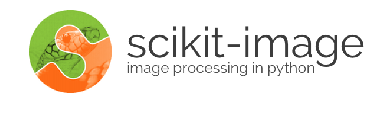

In [13]:
image_filename = '../res/skimage_ico.png'
image = plt.imread(image_filename)
plt.imshow(image)
plt.axis('off') # 不显示坐标轴
plt.show()

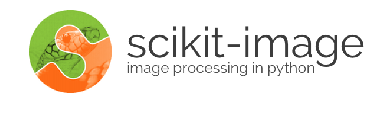

In [14]:
import matplotlib.image as mpimg # mpimg 用于读取图片
lena = mpimg.imread(image_filename) # 读取和代码处于同一目录下的 lena.png
# 此时 lena 就已经是一个 np.array 了，可以对它进行任意处理
lena.shape #(512, 512, 3)
plt.imshow(lena) # 显示图片
plt.axis('off') # 不显示坐标轴
plt.show()

---
# 11.color,marker和line格式字符串

**color, marker and line格式字符串**
``` python
    **Format Strings**
    A format string consists of a part for color, marker and line::
        fmt = '[color][marker][line]'
    Each of them is optional. If not provided, the value from the style
    cycle is used. Exception: If ``line`` is given, but no ``marker``,
    the data will be a line without markers.
```

1. ***Colors***
``` python
    The following color abbreviations are supported:
    =============    ===============================
    character        color
    =============    ===============================
    ``'b'``          blue
    ``'g'``          green
    ``'r'``          red
    ``'c'``          cyan
    ``'m'``          magenta
    ``'y'``          yellow
    ``'k'``          black
    ``'w'``          white
    =============    ===============================
    If the color is the only part of the format string, you can
    additionally use any  `matplotlib.colors` spec, e.g. full names
    (``'green'``) or hex strings (``'#008000'``).
```

2. ***Markers***
``` python
    =============    ===============================
    character        description
    =============    ===============================
    ``'.'``          point marker
    ``','``          pixel marker
    ``'o'``          circle marker
    ``'v'``          triangle_down marker
    ``'^'``          triangle_up marker
    ``'<'``          triangle_left marker
    ``'>'``          triangle_right marker
    ``'1'``          tri_down marker
    ``'2'``          tri_up marker
    ``'3'``          tri_left marker
    ``'4'``          tri_right marker
    ``'s'``          square marker
    ``'p'``          pentagon marker
    ``'*'``          star marker
    ``'h'``          hexagon1 marker
    ``'H'``          hexagon2 marker
    ``'+'``          plus marker
    ``'x'``          x marker
    ``'D'``          diamond marker
    ``'d'``          thin_diamond marker
    ``'|'``          vline marker
    ``'_'``          hline marker
    =============    ===============================
```
3. ***Line Styles***
``` python
    =============    ===============================
    character        description
    =============    ===============================
    ``'-'``          solid line style
    ``'--'``         dashed line style
    ``'-.'``         dash-dot line style
    ``':'``          dotted line style
    =============    ===============================
```

* ***Example format strings***
``` python
    Example format strings::
        'b'    # blue markers with default shape
        'ro'   # red circles
        'g-'   # green solid line
        '--'   # dashed line with default color
        'k^:'  # black triangle_up markers connected by a dotted line
    .. note::
        In addition to the above described arguments, this function can take a
        **data** keyword argument. If such a **data** argument is given, the
        following arguments are replaced by **data[<arg>]**:
        * All arguments with the following names: 'x', 'y'.
```